# Demostration for downloading package and using it

In [1]:
!pip install sghmc

  Running setup.py bdist_wheel for sghmc ... - \ done
  Stored in directory: /home/jovyan/.cache/pip/wheels/6f/4a/2a/8e5e2ac8c9d37920a0854ac4d20e43406275a230b5da471cb5
Successfully built sghmc
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from sghmc import sghmc
from sghmc import hmc
from sghmc import gradUfunction
from sghmc import Ufunction

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Generate binary classification data with $p(x=1) = \frac{1}{1+e^{25.-0.5x}}$ only 1000 data points instead of 10000.

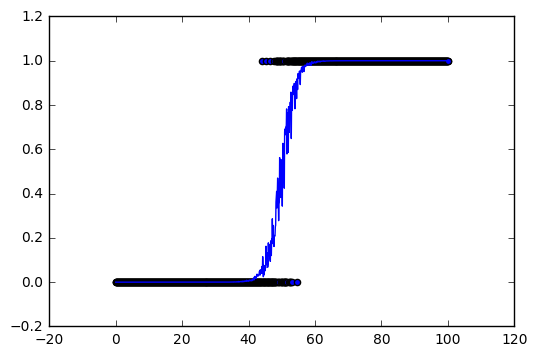

In [9]:
xi = 0.0
xf = 100.0
n = 1000

def logistic(beta,x):
    x = np.c_[np.ones_like(x), x]
    beta_x = (beta*x).sum(axis=1)  + np.random.randn(x.shape[0]) * 0.3
    return 1./(1. + np.exp(-beta_x))

beta = np.array([-25.,0.5])

x = np.linspace(xi,xf,n)

p = logistic(beta, x)

y = np.zeros_like(x)
for i in range(len(x)):
    if np.random.random() < p[i]:
        y[i] = 1.

Data = np.c_[x,y]
plt.scatter(x, y)
plt.plot(x, p)

In [10]:
import functools

gradU_data = functools.partial(gradUfunction.gradU, Data)

U_data = functools.partial(Ufunction.U, Data)

### Doing a MLE for comparison

In [11]:
from scipy.optimize import minimize

minimize(U_data, [-20., 0.4])

      fun: 59.55001001228463
 hess_inv: array([[  1.19959089e+01,  -2.38028762e-01],
       [ -2.38028762e-01,   4.74496804e-03]])
      jac: array([ -1.14440918e-05,  -5.09262085e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 308
      nit: 9
     njev: 74
   status: 2
  success: False
        x: array([-27.65029119,   0.5519009 ])

## Using SGHMC

In [12]:
nsample = 10000
minibatch = 0.1 # using 10% of the original data to compute gradient
gradU_data_SGHMC = functools.partial(gradU_data, minibatch)

V = 1./minibatch
etaSGHMC = (0.001)**2
alpha = 0.01
L = 50

In [13]:
%%time

samplesSGHMC = []
b = np.array([-1., 1])
for i in range(nsample):
    b = sghmc.sghmc(gradU_data_SGHMC, etaSGHMC, L, alpha, b.copy(), V)
    samplesSGHMC.append(b)


CPU times: user 2min 12s, sys: 52 ms, total: 2min 12s
Wall time: 2min 12s


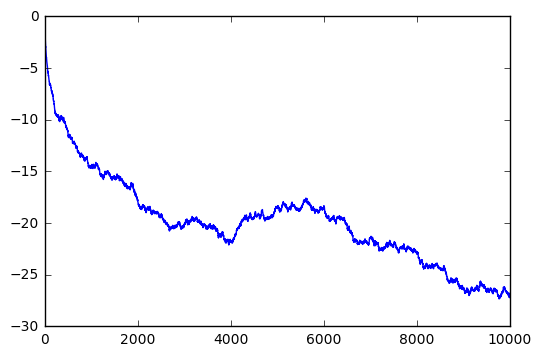

In [14]:
samplesSGHMC = np.array(samplesSGHMC)
plt.plot(samplesSGHMC[:,0])
pass

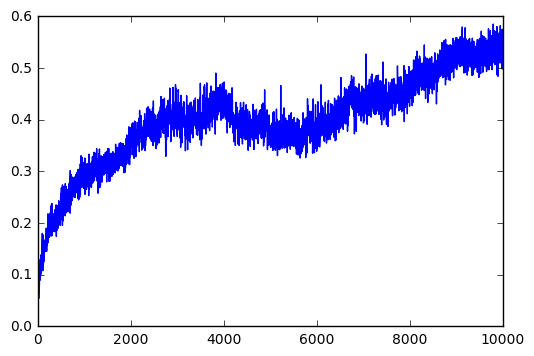

In [15]:
plt.plot(samplesSGHMC[:,1])
pass

## Using HMC

In [16]:
minibatch = 1.
gradU_data_HMC = functools.partial(gradU_data, minibatch)

nsample = 10000
m = 1.
dt = 0.001
nstep = 50
MH=False

In [17]:
%%time


samplesHMC = []
b = np.array([-1.,1.])
for i in range(nsample):
    b = hmc.hmc( U_data, gradU_data_HMC, m, dt, nstep, b.copy(), MH )
    samplesHMC.append(b)

    

CPU times: user 5min 8s, sys: 192 ms, total: 5min 8s
Wall time: 5min 9s


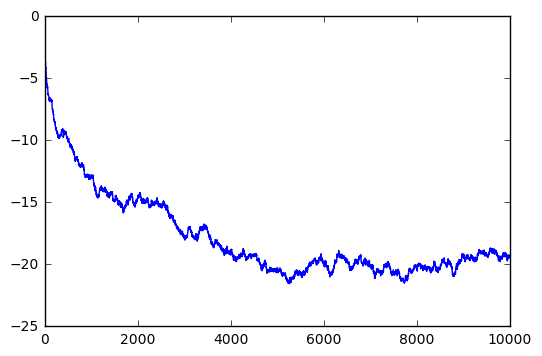

In [18]:
samplesHMC = np.array(samplesHMC)
plt.plot(samplesHMC[:,0])
pass

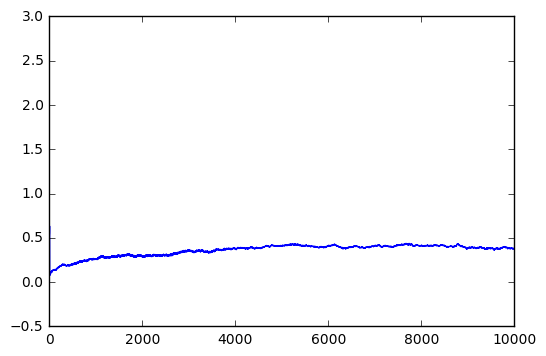

In [19]:
plt.plot(samplesHMC[:,1])
plt.ylim(-0.5,3.)
pass